## Tutorial Notebook 1: Subset sampling

A tutorial showing how to perform $k$-subset sampling with the available solvers.

In [1]:
## Install the library
import sys
sys.path.append('./d2sample/')

In [2]:
from d2sample.subset.gumbel import k_gumbel_softmax, TopKGumbelSoftmax

In [3]:
import torch
import torch.nn.functional as F

In [4]:
# Generate some fake logits
logits = torch.randn((1, 15), requires_grad=True)

In [5]:
# Top-1 sampling is equivalent to classical Gumbel-Softmax
draws = torch.zeros((15,))
for i in range(1000):
  draws += k_gumbel_softmax(logits, k=1, hard=True)[0]

<BarContainer object of 15 artists>

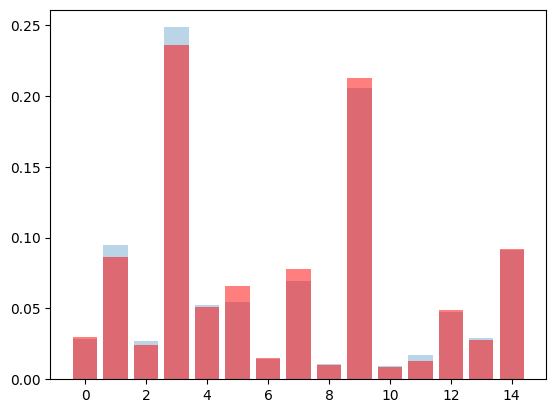

In [6]:
import matplotlib.pyplot as plt
plt.bar(range(15), F.softmax(logits, 1).detach()[0], alpha=0.3)
plt.bar(range(15), draws.detach() / 1000, color='r', alpha=0.5)

In [7]:
# Check a top-3 draw
k_gumbel_softmax(logits, k=3, hard=True)

tensor([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],
       grad_fn=<AddBackward0>)

In [8]:
# Everything is differentiable
k_gumbel_softmax(logits, k=1, hard=True).sum().backward()

In [9]:
# We also have a layered version
TopKGumbelSoftmax(k=2)(logits)

tensor([[0.0096, 0.1785, 0.0571, 1.2462, 0.1229, 0.0665, 0.0293, 0.0414, 0.0196,
         0.1408, 0.0244, 0.0022, 0.0342, 0.0122, 0.0152]],
       grad_fn=<AddBackward0>)

In [10]:
# Other methods have similar syntax
from d2sample.subset.imle import KIMLESampler

In [11]:
# Only have object-oriented version
KIMLESampler(k=3)(logits)

tensor([[1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       grad_fn=<WrappedFuncBackward>)

In [12]:
from d2sample.subset.simple import simple_sampler, SIMPLESampler

NameError: name 'SIMPLE' is not defined

In [ ]:
# Both functional and object-oriented variant
